# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob


# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))



There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


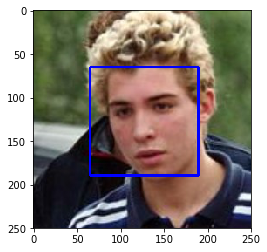

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[2])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

print("Percentage of human faces detected in human data set ={0}%".format(np.sum([face_detector(images) for images in human_files_short])/len(human_files_short)*100))
print("Percentage of human faces detected in dog data set = {0}%".format(np.sum([face_detector(images) for images in dog_files_short])/len(dog_files_short)*100))



Percentage of human faces detected in human data set =98.0%
Percentage of human faces detected in dog data set = 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [1]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.



---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True).eval()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 101042600.10it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #open input image
    input_image= Image.open(img_path)
    
    #Prepocess Input image
    preprocess = transforms.Compose([transforms.Resize(256), 
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    input_tensor=preprocess(input_image)
    input_tensor=input_tensor.view(1, input_tensor.shape[0], input_tensor.shape[1], input_tensor.shape[2])
    
    if use_cuda:
        input_tensor=input_tensor.cuda()
    
    output = VGG16(input_tensor)
    
    return output # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
import torch.nn as nn
import torch.nn.functional as F

def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_class=VGG16_predict(img_path)
    y=F.softmax(predicted_class)
    class_p=torch.argmax(y[0])
    
    if class_p>=151 and class_p<=268:
        x=True
        input_image= Image.open(img_path)
    else:
        x=False
    return x # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

1. The VGG16 model seems to be pretty accurate and is able to detect no dogs in the human data set i.e. 0% dogs detected.
2. In the VGG16 model all dogs are detected(100%) in the 'dog files short' dataset.



In [6]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

print("Number of Dogs detected in human data set ={0}%".format(np.sum([dog_detector(images) for images in human_files_short])/len(human_files_short)*100))
print("Number of Dogs detected in dog data set = {0}%".format(np.sum([dog_detector(images) for images in dog_files_short])/len(dog_files_short)*100))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Number of Dogs detected in human data set =0.0%
Number of Dogs detected in dog data set = 100.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

## Using Alex Net to see if the accuracy is as good as VGG16
import torch
import torchvision.models as models

# define Alexnet model
alexnet = models.alexnet(pretrained=True).eval()

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    alexnet = alexnet.cuda()

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:39<00:00, 6173273.65it/s] 


In [11]:
from PIL import Image
import torchvision.transforms as transforms

def alexnet_predict(img_path):
   
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #open input image
    input_image= Image.open(img_path)
    
    #Prepocess Input image
    preprocess = transforms.Compose([transforms.Resize(256), 
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    input_tensor=preprocess(input_image)
    input_tensor=input_tensor.view(1, input_tensor.shape[0], input_tensor.shape[1], input_tensor.shape[2])
    
    output = alexnet(input_tensor)
    
    return output # predicted class index

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
import torch.nn as nn
import torch.nn.functional as F

def dog_detector_alex(img_path):
    ## TODO: Complete the function.
    predicted_class=alexnet_predict(img_path)
    y=F.softmax(predicted_class)
    class_p=torch.argmax(y[0])
    
    if class_p>=151 and class_p<=268:
        x=True
        input_image= Image.open(img_path)
    else:
        x=False
    return x # true/false

In [13]:
print("Number of Dogs detected in human data set by AlexNet ={0}%".format(np.sum([dog_detector_alex(images) for images in human_files_short])/len(human_files_short)*100))
print("Number of Dogs detected in dog data set by AlexNet = {0}%".format(np.sum([dog_detector_alex(images) for images in dog_files_short])/len(dog_files_short)*100))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Number of Dogs detected in human data set by AlexNet =1.0%
Number of Dogs detected in dog data set by AlexNet = 99.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size= 20

#Path for train test and validation datasets
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
valid_dir = os.path.join(data_dir, 'valid/')


data_transform = transforms.Compose([transforms.Resize((224, 224), interpolation=2), 
                                      transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                         transforms.RandomAffine((-10, 10), translate=(0, 0.1)),
                                            transforms.ToTensor(),
                                                transforms.Normalize((0.4521,  0.4319,  0.3679), (0.2545,  0.2475,  0.2385))])



# Loading data sets and applying transformation

image_dataset={'train':datasets.ImageFolder(train_dir, transform=data_transform),
                   'valid':datasets.ImageFolder(valid_dir, transform=data_transform),
                       'test':datasets.ImageFolder(test_dir, transform=data_transform)}

loaders_scratch={'train':torch.utils.data.DataLoader(image_dataset['train'],batch_size=batch_size, shuffle=True),
                 'valid':torch.utils.data.DataLoader(image_dataset['valid'],batch_size=batch_size, shuffle=True),
                 'test':torch.utils.data.DataLoader(image_dataset['test'],batch_size=batch_size, shuffle=True)}


''' 
#Normalization of data set -> To find Mean and STD

data_train=torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
data_valid=torch.utils.data.DataLoader(validation_data, batch_size=batch_size, shuffle=True)
data_test=torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)



dataiter = iter(data_train)
images = dataiter.next()


## Obtaining mean and Std of the image data set
mean = 0.
std = 0.
nb_samples = 0.


for batch_i, (data, target) in enumerate(data_train):
    batch_samples = len(target)
    data = data.view(batch_samples, data.size(1), -1)
    
    mean += data.mean(2).sum(0)
    
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples
print(mean, std)
# After calculating the mean and Std, checked if mean =~0.0x and Std=1




# printing out data availability stats
print('Num training images: ', len(train_data))
print('Num Validation images: ', len(validation_data))
print('Num test images: ', len(test_data))

'''



" \n#Normalization of data set -> To find Mean and STD\n\ndata_train=torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)\ndata_valid=torch.utils.data.DataLoader(validation_data, batch_size=batch_size, shuffle=True)\ndata_test=torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)\n\n\n\ndataiter = iter(data_train)\nimages = dataiter.next()\n\n\n## Obtaining mean and Std of the image data set\nmean = 0.\nstd = 0.\nnb_samples = 0.\n\n\nfor batch_i, (data, target) in enumerate(data_train):\n    batch_samples = len(target)\n    data = data.view(batch_samples, data.size(1), -1)\n    \n    mean += data.mean(2).sum(0)\n    \n    std += data.std(2).sum(0)\n    nb_samples += batch_samples\n\nmean /= nb_samples\nstd /= nb_samples\nprint(mean, std)\n# After calculating the mean and Std, checked if mean =~0.0x and Std=1\n\n\n\n\n# printing out data availability stats\nprint('Num training images: ', len(train_data))\nprint('Num Validation images: ', len

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
1. The image is bilinearly interpolated and re-sized to a square image (224x224) for having a smaller computational foot print while still preserving features in the original image. Also square image format is chosen to keep the convolutional layers easier to code.

2. Yes, data augmentation was chosen since the data set is small to create diversity and to improve prediction accuracy. Data Augmentation through Horizontal flips, and Random Affine transformations(Rotations and Translation) were used.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [2]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #Conv -L1
        self.conv1_1=nn.Conv2d(3, 32, 3, padding=1)
        
        #Conv -L2
        self.conv2_1=nn.Conv2d(32, 64, 3, padding=1)
        self.conv2_2=nn.Conv2d(64, 64, 3, padding=1)
        #Conv -L3
        self.conv3_1=nn.Conv2d(64, 128, 3, padding=1)
        self.conv3_2=nn.Conv2d(128, 128, 3, padding=1)
        
        #Conv -L4
        self.conv4_1=nn.Conv2d(128, 128, 3, padding=1)
        self.conv4_2=nn.Conv2d(128, 128, 3, padding=1)
        
        #FC1
        self.fc1 =nn.Conv2d(128, 4096, 14, padding=0)
        
        #FC2
        self.fc2 =nn.Linear(4096, 133)
        
        #Dropout
        self.dropout= nn.Dropout(0.6)
        
        #Pooling
        #self.avgpool1 = nn.AvgPool2d(4, 4)
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        ## Define forward behavior
        #Conv1 - in 224x224
        x = F.relu(self.conv1_1(x))
        x = self.pool(x)
        
        #Conv2 - in 112x112
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool(x)
        
        #Conv3 - in 56x56
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = self.pool(x)
        
        #Conv4 - in 28x28
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = self.pool(x)
        
        #Fc1- in 14x14  
        x = self.dropout(x)
        
        x = F.relu(self.fc1(x))
        
        #Flatten -in 1x1x4096
        x = x.view(-1, 4096)
        
        #Fc2 in- 4096
        x = self.fc2(self.dropout(x))
        x = F.log_softmax(x, dim=1)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ The CNN architecture was chosen to extract large features in the first layers. The subsequent layers(2, 3, 4) have increased depth  to extract mores subtle features of different dog breeds. Also the max pooling layers are used for dimensionality reduction of the images. The training network also has a dropout layers for normalization to prevent overfitting. After the convolution layers instead of flattening the image a convolution is used. The output is then fed to a fully connected layer with number of dog breed as the output size.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [3]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=0.005, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    train_loss = 0.0
    valid_loss = 0.0
    

    for epoch in range(1, n_epochs+1):

             
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #Zero Grad Optimizer
            optimizer.zero_grad()
            # Output of the model
            output=model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            #Compute Gradients
            loss.backward()
            #Optimizer Step Update
            optimizer.step()
            # update test loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
          
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # Output of the model
            output=model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update test loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
         
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss< valid_loss_min:
            
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            valid_loss_min=valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(15, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
#Totally the networl was trained in 35 Epochs. Initial run was 20 epochs followed by additional 15epochs.
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.666674 	Validation Loss: 3.890433
Validation loss decreased (inf --> 3.890433).  Saving model ...
Epoch: 2 	Training Loss: 3.590441 	Validation Loss: 3.788778
Validation loss decreased (3.890433 --> 3.788778).  Saving model ...
Epoch: 3 	Training Loss: 3.474319 	Validation Loss: 3.790496
Epoch: 4 	Training Loss: 3.397721 	Validation Loss: 3.756433
Validation loss decreased (3.788778 --> 3.756433).  Saving model ...
Epoch: 5 	Training Loss: 3.275474 	Validation Loss: 3.714199
Validation loss decreased (3.756433 --> 3.714199).  Saving model ...
Epoch: 6 	Training Loss: 3.155803 	Validation Loss: 3.633601
Validation loss decreased (3.714199 --> 3.633601).  Saving model ...
Epoch: 7 	Training Loss: 3.068098 	Validation Loss: 3.641118
Epoch: 8 	Training Loss: 2.978755 	Validation Loss: 3.545541
Validation loss decreased (3.633601 --> 3.545541).  Saving model ...
Epoch: 9 	Training Loss: 2.879130 	Validation Loss: 3.532381
Validation loss decreased (3.545541 --> 3.


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [5]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


#Load the model state 
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# call test function  
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.512395


Test Accuracy: 18% (157/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [6]:
## TODO: Specify data loaders
import os
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size= 10

#Path for train test and validation datasets
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
valid_dir = os.path.join(data_dir, 'valid/')


data_transform = transforms.Compose([transforms.Resize((224, 224), interpolation=2), 
                                      transforms.RandomHorizontalFlip(), # randomly flip and rotate
                                         transforms.RandomAffine((-10, 10), translate=(0, 0.1)),
                                            transforms.ToTensor(),
                                                transforms.Normalize((0.4521,  0.4319,  0.3679), (0.2545,  0.2475,  0.2385))])



# Loading data sets and applying transformation

image_dataset={'train':datasets.ImageFolder(train_dir, transform=data_transform),
                   'valid':datasets.ImageFolder(valid_dir, transform=data_transform),
                       'test':datasets.ImageFolder(test_dir, transform=data_transform)}

loaders_transfer={'train':torch.utils.data.DataLoader(image_dataset['train'],batch_size=batch_size, shuffle=True),
                 'valid':torch.utils.data.DataLoader(image_dataset['valid'],batch_size=batch_size, shuffle=True),
                 'test':torch.utils.data.DataLoader(image_dataset['test'],batch_size=batch_size, shuffle=True)}
 


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# check if CUDA is available
use_cuda = torch.cuda.is_available()

model_transfer = models.resnet50(pretrained=True)
    

    
for param in model_transfer.parameters():
    param.requires_grad = False


model_transfer.fc=nn.Linear(2048, 133)

#print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()
    
    

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 51651531.93it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ In general, the data loader for the previous model was used, the ResNet-50 pretrained model was loaded, and the all the gradients for all the convolution layers except the last linear fully connected layer was disabled. Since the data set is similar and small, the last fully connected layer is alone replaced with the number of dog breeds to be classified. The ResNet50 is chosen primarily because of low Top 5 error percentage in the Imagenet challenge. In addition also because the network has more depth and accuracy, it is highly suited for the current problem to achieve >60% accuracy with limited training. 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [8]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)



### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [10]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    train_loss = 0.0
    valid_loss = 0.0
    

    for epoch in range(1, n_epochs+1):

             
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #Zero Grad Optimizer
            optimizer.zero_grad()
            # Output of the model
            output=model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            #Compute Gradients
            loss.backward()
            #Optimizer Step Update
            optimizer.step()
            # update test loss 
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
          
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # Output of the model
            output=model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update test loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
         
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss< valid_loss_min:
            
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            valid_loss_min=valid_loss
    # return trained model
    return model


In [11]:
# train the model
n_epochs=5
#print(len(loaders_transfer['valid']))
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 2.224104 	Validation Loss: 0.932685
Validation loss decreased (inf --> 0.932685).  Saving model ...
Epoch: 2 	Training Loss: 1.036770 	Validation Loss: 0.829320
Validation loss decreased (0.932685 --> 0.829320).  Saving model ...
Epoch: 3 	Training Loss: 0.868627 	Validation Loss: 0.826227
Validation loss decreased (0.829320 --> 0.826227).  Saving model ...
Epoch: 4 	Training Loss: 0.804175 	Validation Loss: 0.856153
Epoch: 5 	Training Loss: 0.743908 	Validation Loss: 0.839224


In [13]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [14]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.847368


Test Accuracy: 77% (646/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [19]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in image_dataset['train'].classes]

def predict_breed_transfer(img_path):
    use_cuda = torch.cuda.is_available()
    
    # load the image and return the predicted breed
    input_image= Image.open(img_path)
    
    #Prepocess Input image
    preprocess = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224), 
                                     transforms.ToTensor(), 
                                     transforms.Normalize((0.4521,  0.4319,  0.3679), (0.2545,  0.2475,  0.2385))])
    
    input_tensor=preprocess(input_image)
    input_tensor=input_tensor.view(1, input_tensor.shape[0], input_tensor.shape[1], input_tensor.shape[2])
    
    model_transfer = models.resnet50(pretrained=True)
    model_transfer.fc=nn.Linear(2048, 133)
    
    
    if use_cuda:
        input_tensor=input_tensor.cuda()
    
        
    
    model_transfer.to(device)
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))

    model_transfer=model_transfer.eval()

        
    
    
    output =model_transfer(input_tensor)
    output = F.softmax(output, dim=1)
    indexe =torch.argmax(output[0])
    
    return class_names[indexe.numpy()]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [23]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2
import matplotlib.pyplot as plt

def human_present(img_path):
    # extract pre-trained face detector
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    
    img = cv2.imread(img_path)
    
    # load color (BGR) image
    
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)
    
    return len(faces)
         

def run_app(img_path):

    cv_bgr = cv2.imread(img_path)
    input_image =cv2.cvtColor(cv_bgr, cv2.COLOR_BGR2RGB)
    
    # Step 1: Detect if Human is present on the image
    human = human_present(img_path)
    #Step 2: Dog detector.
    dog= dog_detector(img_path)
       
    if human>=1 and not dog:
        #Step 3: Predict the dog_breed/resembling dog breed
        dog_breed = predict_breed_transfer(img_path)
        plt.figure()
        plt.imshow(input_image)
        plt.title('Hello Human, Your look like a {}\n'.format(dog_breed))
        plt.show()
    elif human==0 and dog:
        #Step 3: Predict the dog_breed/resembling dog breed
        dog_breed = predict_breed_transfer(img_path)
        plt.figure()
        plt.imshow(input_image)
        plt.title('Hello Doggy, Your Predicted Breed is {}\n'.format(dog_breed))
        plt.show()
    ## handle cases for a human face, dog, and neither
    else:
        plt.figure()
        plt.imshow(input_image)
        plt.title("No Human or Dog is detected in the image")
        plt.show()
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

This project was really fun. The dog breed classification is pretty good for some breeds while others require more image samples.
1. More epochs of training of the Transer Model. To achieve higher accuracy for dog breed classification.
2. Training the transfer model also with adverserial examples to distinguish what is not a dog. 
3. The major source of errors in the dog breed classification seem to be the sub class distintction for example: distinction of sub breeds of Mastiff. This is even very difficult even for humans. In order to over come this, a sub classification model for specific breeds can be trained. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


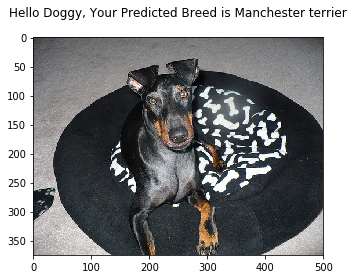

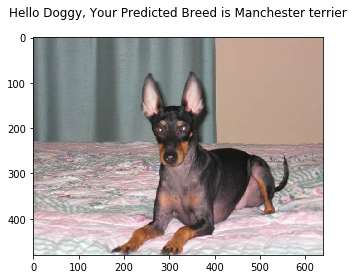

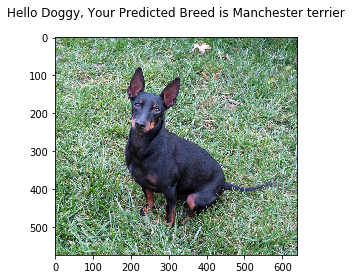

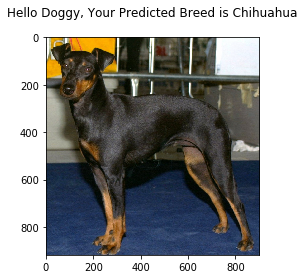

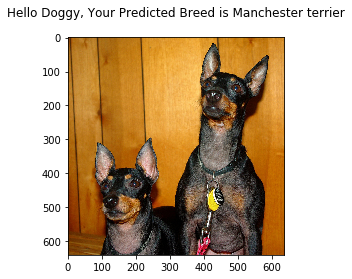

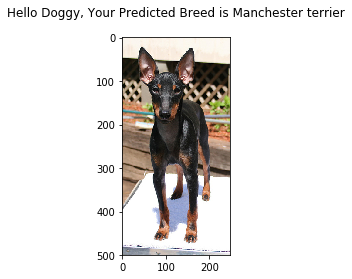

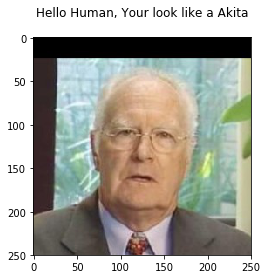

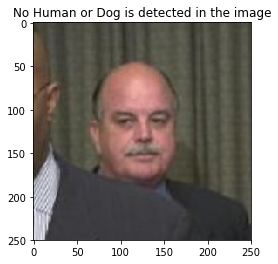

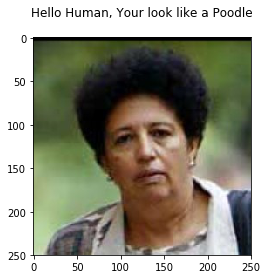

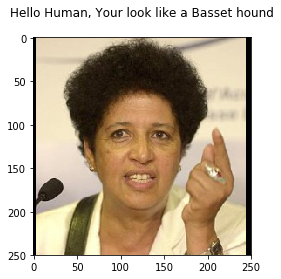

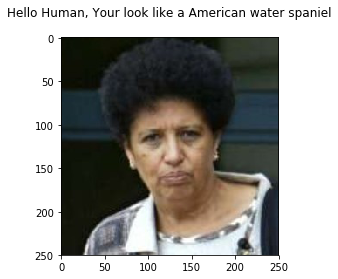

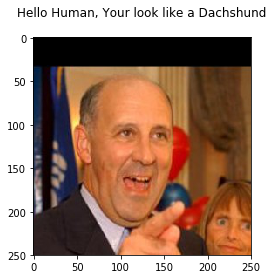

In [28]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from PIL import Image
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

## suggested code, below
for file in np.hstack(( dog_files[1000:1006], human_files[1000:1006])):
    run_app(file)